Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project. 

>#                                    Unemployment rate in 2020

### Import libraries and read the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#from skimpy import skim
#from scipy.stats import mode

In [13]:
df = pd.read_csv("C:\\Users\\bbhav\\Downloads\\Unemployment\\Unemployment_Rate_upto_11_2020.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [15]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


### Data preprocessing 

In [16]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [17]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [18]:
##Assuming ' Date' is your datetime column with the format 'dd-mm-yy'
df['Date'] = df[' Date'].str.strip()  # Remove leading and trailing whitespace
df['TransactionDate'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [19]:
#Extract year, month, and day into separate columns
df['Year'] = df['TransactionDate'].dt.year
df['Month'] = df['TransactionDate'].dt.month
df['Day'] = df['TransactionDate'].dt.day

In [20]:
df.drop([' Date','TransactionDate','Year','Day'],axis = 1, inplace = True)

In [26]:
df.drop('Date',axis=1,inplace=True)

In [27]:
df.head()

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Month
0,Andhra Pradesh,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,M,17.43,12988845,36.46,South,15.9129,79.74,5


### Data Visualization

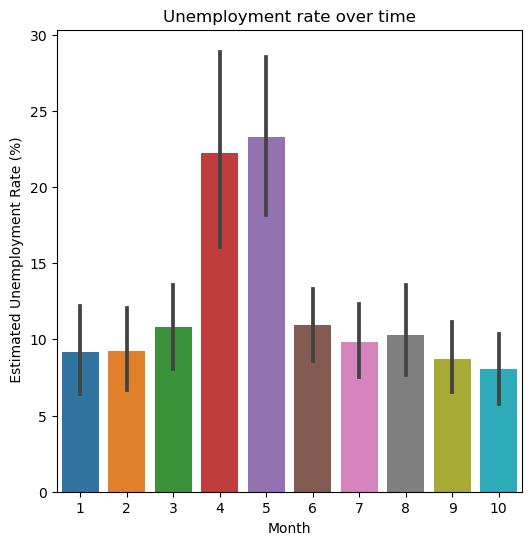

In [28]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'Month', y = ' Estimated Unemployment Rate (%)',data = df )
plt.title('Unemployment rate over time')
plt.show()

>The estimated unemployment rate is less in October 2020 and more in April, May months.

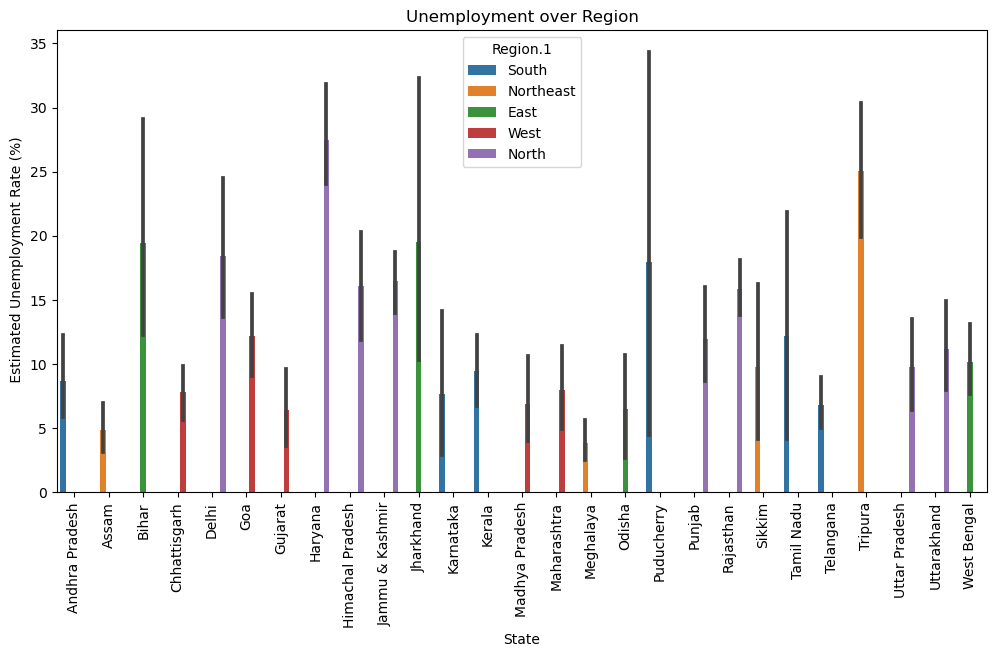

In [29]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Region', hue = 'Region.1', y = ' Estimated Unemployment Rate (%)', data = df)
plt.xlabel('State')
plt.title('Unemployment over Region')
plt.xticks(rotation = 90)
plt.show()

> From the above plot we can observe that the estimated unemployment rate is high north region in Haryana state during covid-19.

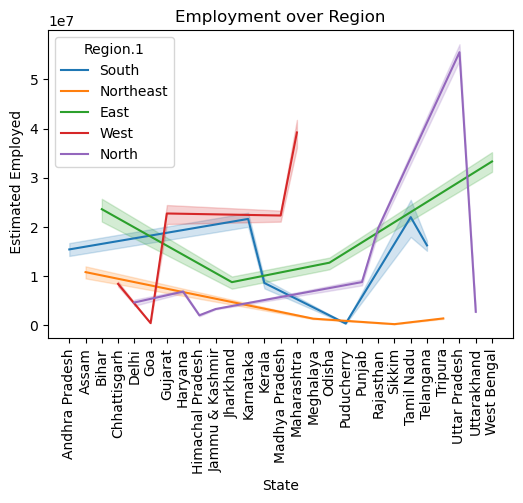

In [30]:
plt.figure(figsize = (6,4))
sns.lineplot(x = 'Region', hue = 'Region.1', y = ' Estimated Employed', data = df)
plt.xlabel('State')
plt.title('Employment over Region')
plt.xticks(rotation = 90)
plt.show()

> In covid-19, number of employed people is high in Utter Pradesh in North region.

### Conclusion:
> From the above visualization we can say that the unemployment rate is high in Haryana state in North region in April and May months. Whereas Estimated Employed is high in north region in Uttar Pradesh during covid-19.